# Task: Prediction price of plot as per square feet area

Importing libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
%matplotlib inline

Reading the data into a DataFrame

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

Understanding the data

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.shape

(21613, 21)

In [9]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Exploring the data

In [13]:
#Since we are doing Linear Regression for single variable we are using only single variable for prediction
df_new = pd.DataFrame(df.price)
df_new['sqft_living'] = df.sqft_living
df_new.head()

price  sqft_living
0  221900.0         1180
1  538000.0         2570
2  180000.0          770
3  604000.0         1960
4  510000.0         1680

In [14]:
df_new.shape

(21613, 2)

In [15]:
df_new.isnull().sum()

price          0
sqft_living    0
dtype: int64

In [29]:
fig = px.scatter(x = df_new.price, y= df_new.sqft_living, labels= {'x': 'Price', 'y': 'Sqft_Living'}, trendline = "ols")
fig.data[1].line.color = 'red'
fig.show()

Removing the outlier i.e, the point between 12k and 14k

In [31]:
df_new.loc[(df_new.sqft_living>13000)]

price  sqft_living
12777  2280000.0        13540

In [33]:
df_new.drop(df_new.query("sqft_living >13000").index, inplace = True)

In [35]:
df_new.shape

(21612, 2)

In [37]:
fig = px.scatter(x = df_new.price, y = df_new.sqft_living, labels = {'x': 'Price', 'y':'Sqft_Living'}, trendline = "ols")
fig.data[1].line.color = 'red'
fig.show()

# Splitting the data into test and train

In [38]:
feature = df_new.sqft_living.values
target = df_new.price.values

In [39]:
#reshape is used to give a new shape to the array without changing its data
feature = feature.reshape(-1,1)
target = target.reshape(-1,1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 42)
print("X_train :",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train :",y_train.shape)
print("y_test : ",y_test.shape)

X_train : (17289, 1)
X_test :  (4323, 1)
y_train : (17289, 1)
y_test :  (4323, 1)


# Implementing the Linear Regression Algorithm

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# Plotting the line with actual vs predicted values

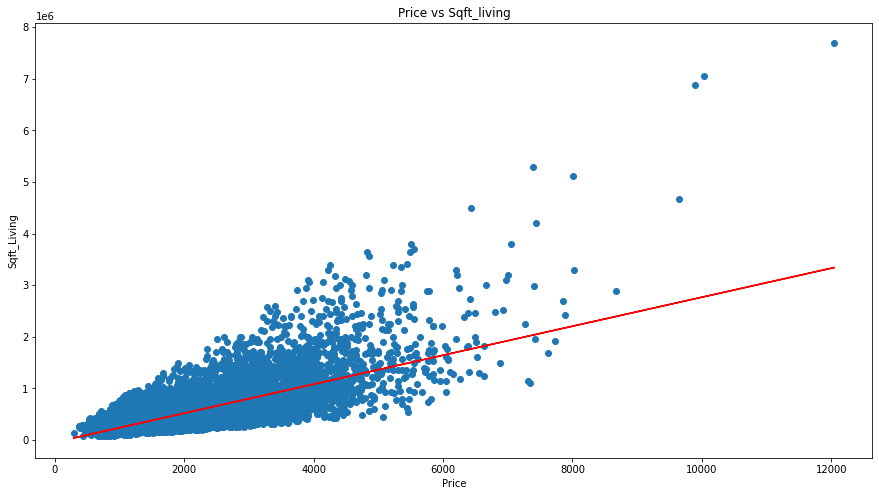

In [42]:
plt.figure(figsize = (15,8))
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.title('Price vs Sqft_living')
plt.xlabel('Price')
plt.ylabel('Sqft_Living')
plt.show()

# Predicting the values

In [43]:
pred_values = lr.predict(X_test)
pred_values

array([[ 537124.07128464],
       [ 770433.90602796],
       [1014987.5882288 ],
       ...,
       [ 639443.08314797],
       [ 587721.38484343],
       [ 677672.16450351]])

# Creating the DataFrame comparing actual vs predicted values

In [45]:
df_ac_vs_pd = pd.DataFrame(pred_values, index = range(0,4323), columns= ['Predicted'])
df_ac_vs_pd['Actual'] = y_test

In [46]:
df_ac_vs_pd.head()

Predicted     Actual
0  5.371241e+05   365000.0
1  7.704339e+05   865000.0
2  1.014988e+06  1038000.0
3  5.483679e+05   590000.0
4  4.612281e+05   352800.0

# Evaluating the performance

In [47]:
print("Mean Absolute Error  = ", mean_absolute_error(y_test,pred_values))

Mean Absolute Error  =  177995.0024244712


# MAPE

In [48]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual-pred)/actual))*100

In [49]:
mape(y_test, pred_values)

36.19128351833864

# Conclusion - as MAPE is 36% , that means sqft_living alone is not responsible for Price.